# Manual Implementation of K-Means for Color Segmentation 

In [1]:
from PIL import Image
import numpy as np
import time
import matplotlib.pyplot as plt

hestain.png is an image of tissue stained with hemotoxylin and eosin (H&E). This staining method helps pathologists distinguish between tissue types that are stained blue-purple and pink. Then the algorithm will segment the image into k regions in the RGB color space. For each pixel in the input image, the algorithm returns a label corresponding to a cluster.

In [2]:
#kmeans algorithm utilizing l2 norm
def kmeans_l2(pixels, k):
    
    start_time = time.time()
    
    #flatten the pixels
    v_img = pixels.reshape(-1, 3)
    
    #assign random pixel as centroid using broadcasting
    c = v_img[np.random.randint(0, len(v_img), k),:]
    c = np.reshape(c,[k,1,3])
    x = np.reshape(v_img, [1,len(v_img),3])
    
    #keep track of the iterations
    count = 1
    prev_c = c
    
    while True:    
        
        #calculate distance change
        d = np.sqrt(np.sum(np.square(x - c), axis = 2))
        
        #create one hot encoding of assigned classes for better calculation of new centroid
        pi = np.argmin(d, axis = 0)
        one_hot_pi = np.zeros((pi.size, pi.max()+1))
        one_hot_pi[np.arange(pi.size), pi] = 1
        pi = np.reshape(one_hot_pi.T,[k,1,len(v_img)])
        
        #calculate new center based on mean of classes
        c = np.around((pi @ x)/np.reshape(np.sum(one_hot_pi, axis = 0), [k, 1, 1]),0)
        
        #if cluster center no longer changes
        if np.array_equal(prev_c, c):
            break
        
        prev_c = c
        count+= 1
        
    pi = np.argmin(d, axis = 0)
    c = np.reshape(c, [k, 3])
    pix_compress = c[pi].reshape(pixels.shape)
    
    return pi, c, count, (time.time() - start_time), pix_compress


In [8]:
football = np.array(Image.open('data/football.bmp'))
hestain = np.array(Image.open('data/hestain.bmp'))

(-0.5, 297.5, 223.5, -0.5)

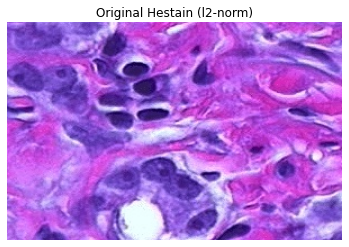

In [16]:
plt.title("Original Hestain (l2-norm)")
plt.imshow(hestain, aspect='auto')
plt.axis('off')

(-0.5, 297.5, 223.5, -0.5)

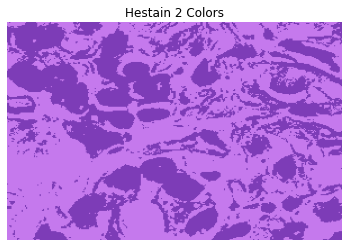

In [29]:
#set seed
np.random.seed(123)

#hestain euclidean distance
pi1, centers1, count1, runtime1, img1 = kmeans_l2(hestain, 2)    
pi2, centers2, count2, runtime2, img2 = kmeans_l2(hestain, 4)        
pi2, centers2, count2, runtime2, img3 = kmeans_l2(hestain, 6) 

plt.title('Hestain 2 Colors')
plt.imshow(img1.astype(np.uint8), aspect='auto')
plt.axis('off')


(-0.5, 297.5, 223.5, -0.5)

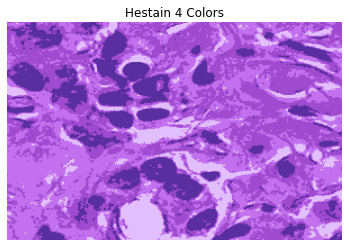

In [30]:
plt.title('Hestain 4 Colors')
plt.imshow(img2.astype(np.uint8), aspect='auto')
plt.axis('off')

(-0.5, 297.5, 223.5, -0.5)

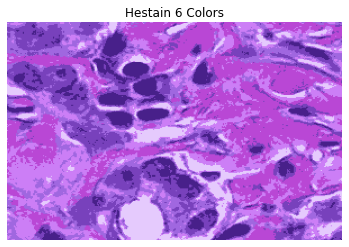

In [31]:
plt.title('Hestain 6 Colors')
plt.imshow(img3.astype(np.uint8), aspect='auto')
plt.axis('off')

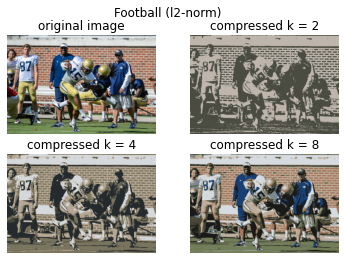

In [9]:
#football euclidean distance
pi1, centers1, count1, runtime1, img1 = kmeans_l2(football, 2)    
pi2, centers2, count2, runtime2, img2 = kmeans_l2(football, 4)        
pi3, centers3, count3, runtime3, img3 = kmeans_l2(football, 8) 

f, axarr = plt.subplots(2,2)
plt.suptitle("Football (l2-norm)")
axarr[0,0].imshow(football)
axarr[0,0].axis('off')
axarr[0,0].title.set_text('original image')
axarr[0,1].imshow(img1.astype(np.uint8))
axarr[0,1].axis('off')
axarr[0,1].title.set_text('compressed k = 2')
axarr[1,0].imshow(img2.astype(np.uint8))
axarr[1,0].axis('off')
axarr[1,0].title.set_text('compressed k = 4')
axarr[1,1].imshow(img3.astype(np.uint8))
axarr[1,1].axis('off')
axarr[1,1].title.set_text('compressed k = 8')
